In [402]:
import os
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.data import Dataset
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm

In [403]:
data = pd.read_csv('C:/Users/admin/Documents/Bangkit/bangkit-assignment5/Housing.csv', index_col=0)

In [404]:
df = data

In [405]:
df.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [406]:
def convert_yes_no_to_boolean(x, data):
    dataFrame = data[x].replace({"yes": 1, "no": 0}, inplace=True)
    return dataFrame

In [407]:
convert_yes_no_to_boolean('driveway', df)

In [408]:
convert_yes_no_to_boolean('recroom', df)
convert_yes_no_to_boolean('fullbase', df)
convert_yes_no_to_boolean('gashw', df)
convert_yes_no_to_boolean('airco', df)
convert_yes_no_to_boolean('prefarea', df)

In [409]:
df.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [410]:
df.describe()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


 price increases till 4 bedroom then descreases
 most data is for 3 and 4 bedroom


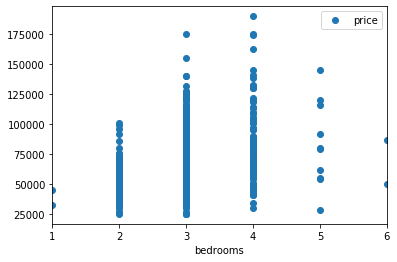

In [411]:
df.plot(x='bedrooms', y='price', style='o') 
print(" price increases till 4 bedroom then descreases")
print(" most data is for 3 and 4 bedroom")

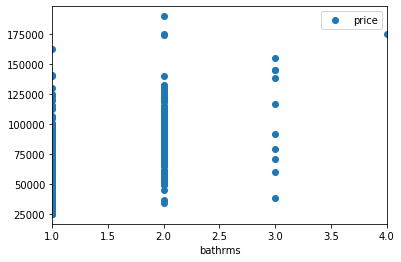

In [412]:
df.plot(x='bathrms', y='price', style='o') 

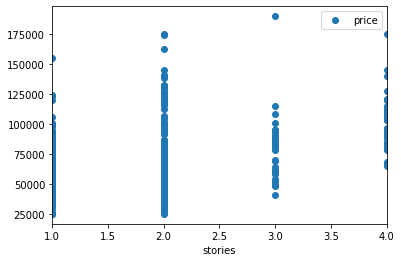

In [413]:
df.plot(x='stories', y='price', style='o') 

lot size seems to be good feature


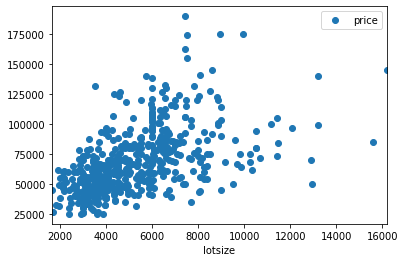

In [414]:
df.plot(x='lotsize', y='price', style='o') 
print ('lot size seems to be good feature')

 seems to be feature vector


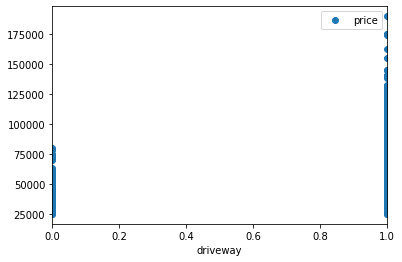

In [415]:
df.plot(x='driveway', y='price', style='o') 
print(" seems to be feature vector")

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


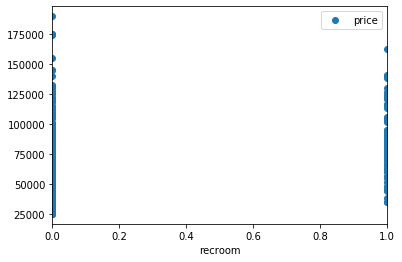

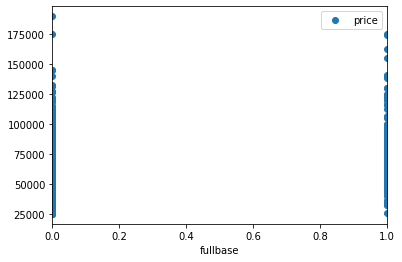

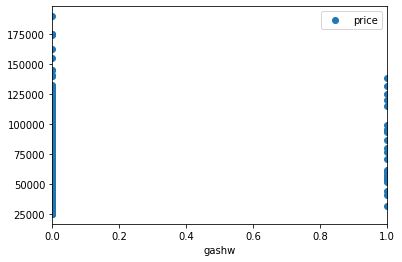

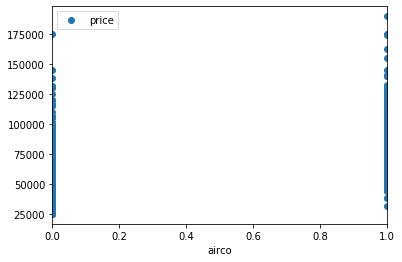

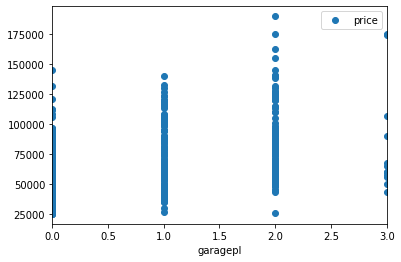

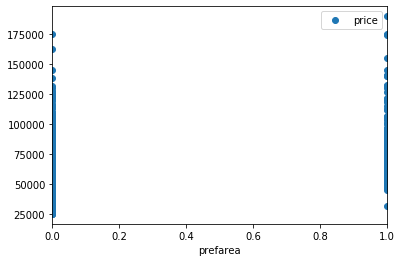

In [416]:
print(df.plot(x='recroom', y='price', style='o'))
print(df.plot(x='fullbase', y='price', style='o'))
print(df.plot(x='gashw', y='price', style='o'))
print(df.plot(x='airco', y='price', style='o'))
print(df.plot(x='garagepl', y='price', style='o'))
print(df.plot(x='prefarea', y='price', style='o'))

In [370]:
#shuffle data
df = df.reindex(np.random.permutation(data.index)) 

In [371]:
df.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
72,51000.0,3150,3,1,2,1,0,1,0,0,0,0
265,50000.0,3640,2,1,1,1,0,0,0,0,1,0
314,75000.0,5500,3,2,1,1,0,1,0,0,0,0
194,57500.0,3460,3,2,1,1,0,1,0,1,1,0
387,83900.0,11460,3,1,3,1,0,0,0,0,2,1


In [372]:
df['lotsize'].max()

16200

In [373]:
# pd.cut(data['lotsize'], [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000]).head()

In [374]:
df.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
72,51000.0,3150,3,1,2,1,0,1,0,0,0,0
265,50000.0,3640,2,1,1,1,0,0,0,0,1,0
314,75000.0,5500,3,2,1,1,0,1,0,0,0,0
194,57500.0,3460,3,2,1,1,0,1,0,1,1,0
387,83900.0,11460,3,1,3,1,0,0,0,0,2,1


In [375]:
# bucketization function
def bucketization(x, df, n):
    bins = [i*2000 for i in range(0,n+1)]
    df[x] = pd.cut(df[x], bins, labels=False)

In [350]:
pd.cut?

In [376]:
bucketization('lotsize', df, 9)

In [377]:
df.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
72,51000.0,1,3,1,2,1,0,1,0,0,0,0
265,50000.0,1,2,1,1,1,0,0,0,0,1,0
314,75000.0,2,3,2,1,1,0,1,0,0,0,0
194,57500.0,1,3,2,1,1,0,1,0,1,1,0
387,83900.0,5,3,1,3,1,0,0,0,0,2,1


In [378]:
# scalling function
def scalling(x, df, n):
    df[x] = df[x]/n

In [379]:
scalling('price', df, 10000)

In [380]:
df.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
72,5.10,1,3,1,2,1,0,1,0,0,0,0
265,5.00,1,2,1,1,1,0,0,0,0,1,0
314,7.50,2,3,2,1,1,0,1,0,0,0,0
194,5.75,1,3,2,1,1,0,1,0,1,1,0
387,8.39,5,3,1,3,1,0,0,0,0,2,1


In [381]:
df.describe()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,6.812160,2.043956,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,2.670267,1.142141,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,2.500000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.912500,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.200000,2.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.200000,3.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,19.000000,8.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [382]:
#because mean of price is 6.8, we make threshold = 6.8
threshold = 6.8
df["house_value_is_high"] = (df["price"] > threshold).astype(float)
df["house_value_is_high"] = (df["price"] > threshold).astype(float) 
df["house_value_is_high"].head()

72     0.0
265    0.0
314    1.0
194    0.0
387    1.0
Name: house_value_is_high, dtype: float64

In [383]:
feature_set = ['bedrooms','stories','driveway','garagepl']

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


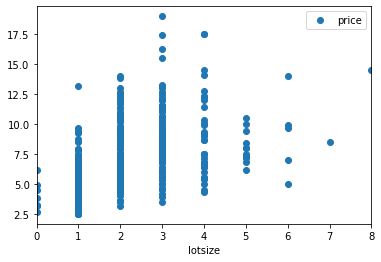

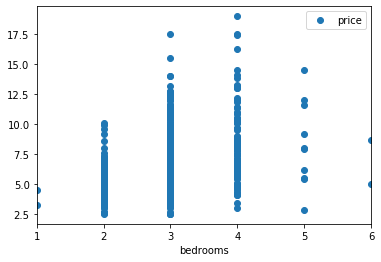

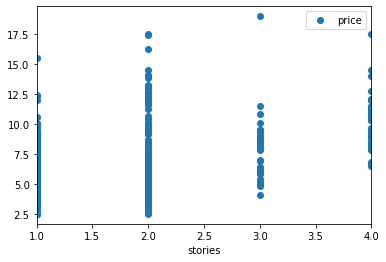

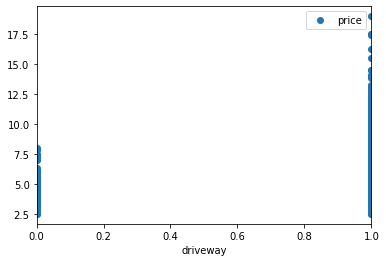

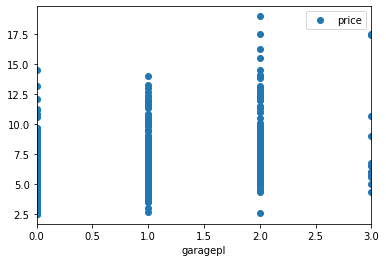

In [384]:
print(df.plot(x='lotsize', y='price', style='o'))
print(df.plot(x='bedrooms', y='price', style='o'))
print(df.plot(x='stories', y='price', style='o'))
print(df.plot(x='driveway', y='price', style='o'))
print(df.plot(x='garagepl', y='price', style='o'))

In [385]:
df_train, df_test = train_test_split(df, test_size=0.1)

In [386]:
df_train.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,house_value_is_high
81,5.00,2,3,1,2,1,0,0,0,1,0,0,0.0
210,9.25,1,3,1,1,1,0,1,0,0,2,0,1.0
263,4.85,1,2,1,1,1,0,0,0,0,0,0,0.0
8,6.90,2,3,1,3,1,0,0,0,0,0,0,1.0
434,7.30,5,2,1,2,1,0,0,0,0,0,1,1.0


In [387]:
df_train.shape

(491, 13)

In [388]:
df_test.shape

(55, 13)

In [389]:
def tf_feature_columns(input_features):
    feature_columns = []
    for my_feature in input_features:
        feature_columns.append(tf.feature_column.numeric_column(my_feature))
    return feature_columns

In [390]:
df_train.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,house_value_is_high
81,5.00,2,3,1,2,1,0,0,0,1,0,0,0.0
210,9.25,1,3,1,1,1,0,1,0,0,2,0,1.0
263,4.85,1,2,1,1,1,0,0,0,0,0,0,0.0
8,6.90,2,3,1,3,1,0,0,0,0,0,0,1.0
434,7.30,5,2,1,2,1,0,0,0,0,0,1,1.0


In [391]:
tf_feature_columns = tf_feature_columns(feature_set)
feature_layer = layers.DenseFeatures(tf_feature_columns)
feature_layer(dict(df_train))
# tf_feature_columns

<tf.Tensor: shape=(491, 4), dtype=float32, numpy=
array([[3., 1., 0., 2.],
       [3., 1., 2., 1.],
       [2., 1., 0., 1.],
       ...,
       [3., 1., 0., 2.],
       [4., 1., 3., 4.],
       [2., 1., 0., 1.]], dtype=float32)>

In [392]:
#@title Define the functions that create and train a model.
def create_model(my_learning_rate, tf_feature_columns, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(tf_feature_columns)

  # Funnel the regression value through a sigmoid function.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.  Notice that we're using a different loss
  # function for classification than for regression.    
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


In [393]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


Train on 491 samples
Epoch 1/20
491/491 [==============================] - 1s 2ms/sample - loss: 0.8468 - accuracy: 0.4114
Epoch 2/20
491/491 [==============================] - 0s 17us/sample - loss: 0.8321 - accuracy: 0.4114
Epoch 3/20
491/491 [==============================] - 0s 28us/sample - loss: 0.8217 - accuracy: 0.4114
Epoch 4/20
491/491 [==============================] - 0s 24us/sample - loss: 0.8126 - accuracy: 0.4114
Epoch 5/20
491/491 [==============================] - 0s 24us/sample - loss: 0.8044 - accuracy: 0.4114
Epoch 6/20
491/491 [==============================] - 0s 25us/sample - loss: 0.7967 - accuracy: 0.4114
Epoch 7/20
491/491 [==============================] - 0s 24us/sample - loss: 0.7895 - accuracy: 0.4114
Epoch 8/20
491/491 [==============================] - 0s 29us/sample - loss: 0.7827 - accuracy: 0.4114
Epoch 9/20
491/491 [==============================] - 0s 32us/sample - loss: 0.7762 - accuracy: 0.4114
Epoch 10/20
491/491 [==============================] 

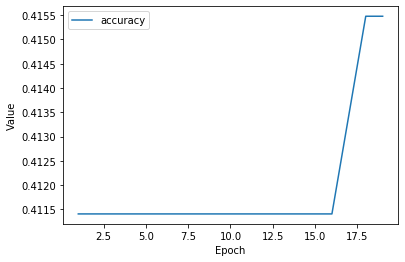

In [394]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "house_value_is_high"
classification_threshold = 0.35

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train, epochs, 
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [395]:
# Evaluate the model against the test set
features = {name:np.array(value) for name, value in df_test.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

55/55 [==============================] - 0s 3ms/sample - loss: 0.7764 - accuracy: 0.4000


[0.7763835787773132, 0.4]

Train on 491 samples
Epoch 1/20
491/491 [==============================] - 1s 2ms/sample - loss: 0.7923 - accuracy: 0.4745 - precision: 0.3704 - recall: 0.3960
Epoch 2/20
491/491 [==============================] - 0s 30us/sample - loss: 0.7859 - accuracy: 0.4745 - precision: 0.3704 - recall: 0.3960
Epoch 3/20
491/491 [==============================] - 0s 38us/sample - loss: 0.7816 - accuracy: 0.4766 - precision: 0.3733 - recall: 0.4010
Epoch 4/20
491/491 [==============================] - 0s 31us/sample - loss: 0.7780 - accuracy: 0.4664 - precision: 0.3649 - recall: 0.4010
Epoch 5/20
491/491 [==============================] - 0s 40us/sample - loss: 0.7749 - accuracy: 0.4705 - precision: 0.3705 - recall: 0.4109
Epoch 6/20
491/491 [==============================] - 0s 35us/sample - loss: 0.7720 - accuracy: 0.4745 - precision: 0.3761 - recall: 0.4208
Epoch 7/20
491/491 [==============================] - 0s 25us/sample - loss: 0.7694 - accuracy: 0.4766 - precision: 0.3799 - recall: 0.4307


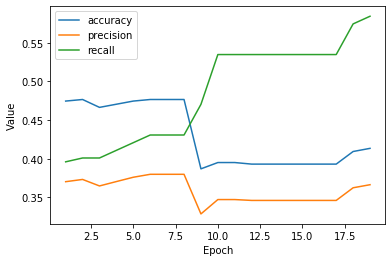

In [397]:
# Add precision and recall as metrics
#@title Double-click to view the solution for Task 3.

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.35
label_name = "house_value_is_high"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)


# The new graphs suggest that precision and recall are 
# somewhat in conflict. That is, improvements to one of
# those metrics may hurt the other metric.

Train on 491 samples
Epoch 1/20
491/491 [==============================] - 1s 2ms/sample - loss: 1.0930 - accuracy: 0.4134 - precision: 0.4122 - recall: 1.0000
Epoch 2/20
491/491 [==============================] - 0s 40us/sample - loss: 1.0729 - accuracy: 0.4134 - precision: 0.4122 - recall: 1.0000
Epoch 3/20
491/491 [==============================] - 0s 39us/sample - loss: 1.0584 - accuracy: 0.4134 - precision: 0.4122 - recall: 1.0000
Epoch 4/20
491/491 [==============================] - 0s 29us/sample - loss: 1.0456 - accuracy: 0.4114 - precision: 0.4110 - recall: 0.9950
Epoch 5/20
491/491 [==============================] - 0s 26us/sample - loss: 1.0338 - accuracy: 0.4114 - precision: 0.4110 - recall: 0.9950
Epoch 6/20
491/491 [==============================] - 0s 31us/sample - loss: 1.0226 - accuracy: 0.4114 - precision: 0.4110 - recall: 0.9950
Epoch 7/20
491/491 [==============================] - 0s 21us/sample - loss: 1.0121 - accuracy: 0.4114 - precision: 0.4110 - recall: 0.9950


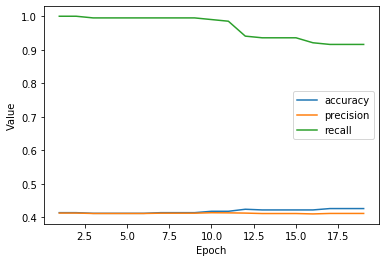

In [398]:
# Experiment with the classification threshold (if time permits)

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.52
label_name = "house_value_is_high"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

# A `classification_threshold` of slightly over 0.5
# appears to produce the highest accuracy (about 83%).
# Raising the `classification_threshold` to 0.9 drops 
# accuracy by about 5%.  Lowering the 
# `classification_threshold` to 0.3 drops accuracy by 
# about 3%. 

Train on 491 samples
Epoch 1/20
491/491 [==============================] - 1s 2ms/sample - loss: 0.9923 - auc: 0.2822
Epoch 2/20
491/491 [==============================] - 0s 38us/sample - loss: 0.9747 - auc: 0.2862
Epoch 3/20
491/491 [==============================] - 0s 33us/sample - loss: 0.9620 - auc: 0.2866
Epoch 4/20
491/491 [==============================] - 0s 39us/sample - loss: 0.9511 - auc: 0.2869
Epoch 5/20
491/491 [==============================] - 0s 36us/sample - loss: 0.9410 - auc: 0.2891
Epoch 6/20
491/491 [==============================] - 0s 38us/sample - loss: 0.9313 - auc: 0.2881
Epoch 7/20
491/491 [==============================] - 0s 37us/sample - loss: 0.9224 - auc: 0.2912
Epoch 8/20
491/491 [==============================] - 0s 24us/sample - loss: 0.9134 - auc: 0.2928
Epoch 9/20
491/491 [==============================] - 0s 30us/sample - loss: 0.9046 - auc: 0.2914
Epoch 10/20
491/491 [==============================] - 0s 30us/sample - loss: 0.8962 - auc: 0.2939

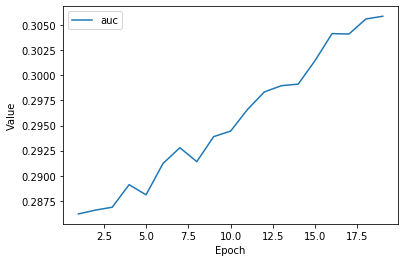

In [401]:
# Summarize model performance (if time permits)

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "house_value_is_high"

# AUC is a reasonable "summary" metric for 
# classification models.
# Here is the updated definition of METRICS to 
# measure AUC:
METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['auc'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)